In [1]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [4]:
# Dataset: https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.country=Spain&q=Madrid
# Link directo: https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B

In [5]:
# Recurso para aprender a cargar datos en Colab: 
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [6]:
# nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2020-06-27 19:32:05--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [         <=>        ]  54.19M   695KB/s    in 64s     

2020-06-27 19:33:11 (870 KB/s) - ‘airbnb-listings.csv’ saved [56826824]



In [7]:
!ls -lah

total 55M
drwxr-xr-x 1 root root 4.0K Jun 27 19:32 .
drwxr-xr-x 1 root root 4.0K Jun 27 19:30 ..
-rw-r--r-- 1 root root  55M Jun 27 19:33 airbnb-listings.csv
drwxr-xr-x 1 root root 4.0K Jun 25 17:02 .config
drwx------ 4 root root 4.0K Jun 27 19:31 drive
drwxr-xr-x 1 root root 4.0K Jun 17 16:18 sample_data


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros

data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,...,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,12768616,https://www.airbnb.com/rooms/12768616,20170407214050,2017-04-08,Ramblas Studio D,"Unique apartment in vibrant neighborhoods, car...",Centrally located in the atmospheric Gothic Qu...,"Unique apartment in vibrant neighborhoods, car...",none,Located on the edge of the Gothic Quarter of B...,NaN,The nearest station is Place de Catalunya a fe...,NaN,NaN,No pets or smoking allowed.,https://a0.muscache.com/im/pictures/cffe393a-0...,https://a0.muscache.com/im/pictures/cffe393a-0...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/cffe393a-0...,54310958,https://www.airbnb.com/users/show/54310958,Javier,2016-01-12,"Madrid, Community of Madrid, Spain",Be Mate offers the exclusive City Mate service...,within an hour,99.0,NaN,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,L'Antiga Esquerra de l'Eixample,207.0,207.0,"email,phone,reviews,jumio","El Gòtic, Barcelona, Catalunya 08002, Spain",El Gòtic,el Barri Gòtic,Ciutat Vella,Barcelona,Catalunya,...,2,1.0,0.0,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,349.0,NaN,NaN,NaN,NaN,1,0,2,1125,a week ago,NaN,2,2,2,2,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,92,NaN,"41.3838872822,2.17180232785","Host Has Profile Pic,Host Identity Verified,Is..."
1,1629146,https://www.airbnb.com/rooms/1629146,20170407214050,2017-04-08,"Design, art & vintage / old city","If you're looking for a cool, spacious, light,...",The apartment is very comfortable and very tas...,"If you're looking for a cool, spacious, light,...",none,• A major advantage of this apartment is its l...,• Possibility of offering Premium Services suc...,• Nearest metro station is 1 min walk (Sant A...,Here's a list of of things we provide to our g...,==============================================...,* NO parties are allowed * NO noise on the st...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/ea919e56-a...,8658841,https://www.airbnb.com/users/show/8658841,Olga & Co.,2013-09-05,"Barcelona, Catalonia, Spain","World traveller, currently living and working ...",within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/d67fdad1-e...,https://a0.muscache.com/im/pictures/d67fdad1-e...,El Raval,2.0,2.0,"email,phone,reviews,jumio","El Raval, Barcelona, Catalonia 08001, Spain",El Raval,el Raval,Ciutat Vella,Barcelona,Catalonia,...,6,1.0,2.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,165.0,NaN,NaN,150.0,60.0,4,20,3,30,2 days ago,NaN,5,10,22,80,2017-04-08,110,2013-10-19,2017-03-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,NaN,strict,1,2.60,"41.3826627171,2.16755841626","Host Has Profile Pic,Host Identity Ve

In [10]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
data.shape

(14001, 89)

In [11]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

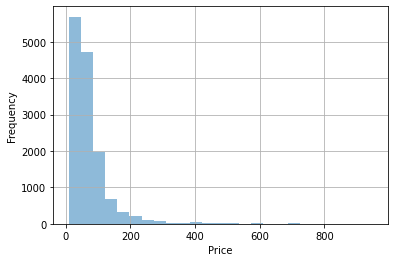

In [12]:

data['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.show()

In [13]:
print(f"El precio de alquiler varía entre: {data['Price'].min()} y {data['Price'].max()} Euros")

El precio de alquiler varía entre: 9.0 y 950.0 Euros


In [14]:
# Hacemos un drop de todas las columnas que OBVIAMENTE no aportan información relevante
not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count'
]

data.drop(not_useful_columns, axis=1, inplace=True)

In [15]:
# Hacemos un drop de todas las columnas que aportando información quedan fuera del scope
somehow_useful_columns_but_droppable_anyway = ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About','Amenities','Features','Experiences Offered','Host Verifications'
]

data.drop(somehow_useful_columns_but_droppable_anyway, axis=1, inplace=True)

In [16]:
#Separamos el dataset en train y test
from sklearn.model_selection import train_test_split
#full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')
# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)
# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 


Dimensiones del dataset de training: (11200, 49)
Dimensiones del dataset de test: (2801, 49)


In [17]:
dfTrain = pd.read_csv('./train.csv', sep=';', decimal='.')

In [18]:
#Separamos el dataset de train en train y validacion
train, val = train_test_split(dfTrain, test_size=0.2, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de val: {val.shape}')
# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
val.to_csv('./val.csv', sep=';', decimal='.', index=False)
# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
dfTrain = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (8960, 49)
Dimensiones del dataset de val: (2240, 49)


In [19]:
data.dtypes

Thumbnail Url                    object
Host Since                       object
Host Response Time               object
Host Response Rate              float64
Host Acceptance Rate            float64
Street                           object
Neighbourhood                    object
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
City                             object
State                            object
Zipcode                          object
Market                           object
Smart Location                   object
Country Code                     object
Country                          object
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object


In [20]:
print(f"El precio de alquiler varía entre: {dfTrain['Price'].min()} y {dfTrain['Price'].max()} Euros")

El precio de alquiler varía entre: 9.0 y 950.0 Euros


In [21]:
list(dfTrain.select_dtypes(include=['object']).columns)

['Thumbnail Url',
 'Host Since',
 'Host Response Time',
 'Street',
 'Neighbourhood',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'State',
 'Zipcode',
 'Market',
 'Smart Location',
 'Country Code',
 'Country',
 'Property Type',
 'Room Type',
 'Bed Type',
 'License',
 'Cancellation Policy']

Nos vamos a ceñir solo a Madrid capital

In [22]:
dfTrain['City'].unique()
dfTrain['City'].value_counts()

Madrid                  8445
Barcelona                185
马德里                       37
Alcúdia                   29
Palma                     27
                        ... 
Sa Garriga                 1
Caimari                    1
Lloret de Vistalegre       1
Cala Murada                1
Son Moll                   1
Name: City, Length: 105, dtype: int64

In [23]:
df_Madrid = dfTrain[dfTrain['City']!='Madrid']

In [24]:
df_Madrid.shape

(515, 49)

In [25]:
dfTrain.drop(df_Madrid.index, inplace = True)

In [26]:
#Podemos borrar estas variable de situación y nos vamos a quedar con la latitud, longitud y barrio
columnas_loc = [
    'City', 'Country','Country Code', 'State', 'Market', 'Smart Location', 'Street', 'Zipcode'
]
dfTrain.drop(columnas_loc, axis=1, inplace=True)

In [27]:
dfTrain.shape

(8445, 41)

In [28]:
(len(dfTrain) - dfTrain.count())/len(dfTrain)*100

Thumbnail Url                    18.804026
Host Since                        0.035524
Host Response Time               12.445234
Host Response Rate               12.445234
Host Acceptance Rate            100.000000
Neighbourhood                    33.818828
Neighbourhood Cleansed            0.000000
Neighbourhood Group Cleansed      0.000000
Latitude                          0.000000
Longitude                         0.000000
Property Type                     0.000000
Room Type                         0.000000
Accommodates                      0.000000
Bathrooms                         0.319716
Bedrooms                          0.153937
Beds                              0.367081
Bed Type                          0.000000
Square Feet                      96.127886
Price                             0.082889
Security Deposit                 56.791001
Cleaning Fee                     40.343398
Guests Included                   0.000000
Extra People                      0.000000
Minimum Nig

Borramos las columnas que tengan un 95% o mayor de nulos

In [29]:
columnas_nulos = [
    'Host Acceptance Rate', 'Square Feet','Has Availability','License', 'Jurisdiction Names'
]
dfTrain.drop(columnas_nulos, axis=1, inplace=True)

Vamos que variables podedmos eliminar por estar fuertemente correladas

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


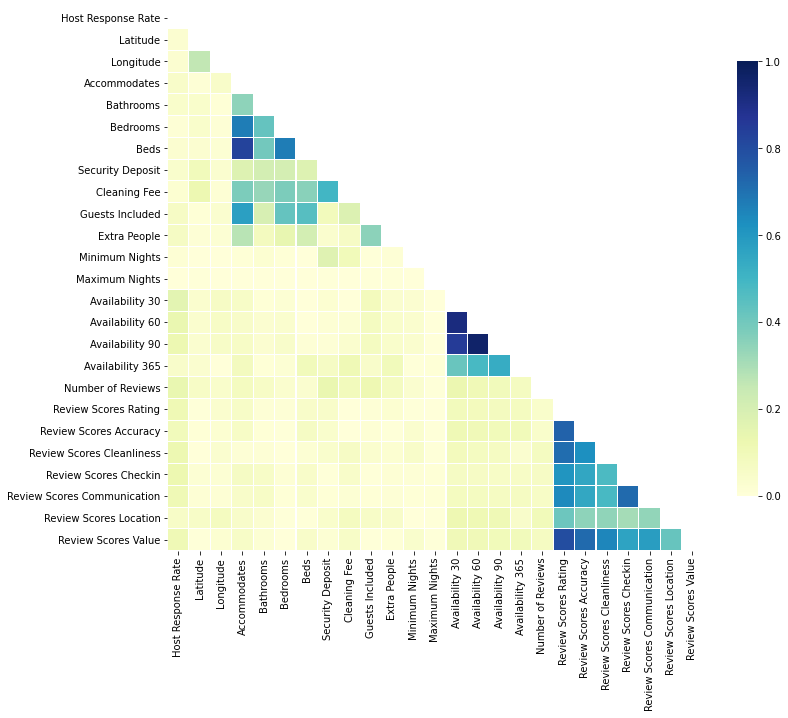

In [30]:
import seaborn as sns
import numpy as np
# Compute the correlation matrix
corr = np.abs(dfTrain.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

In [31]:
columnas_cr = [
    'Accommodates','Availability 60','Availability 90','Review Scores Rating'
]
dfTrain.drop(columnas_cr, axis=1, inplace=True)

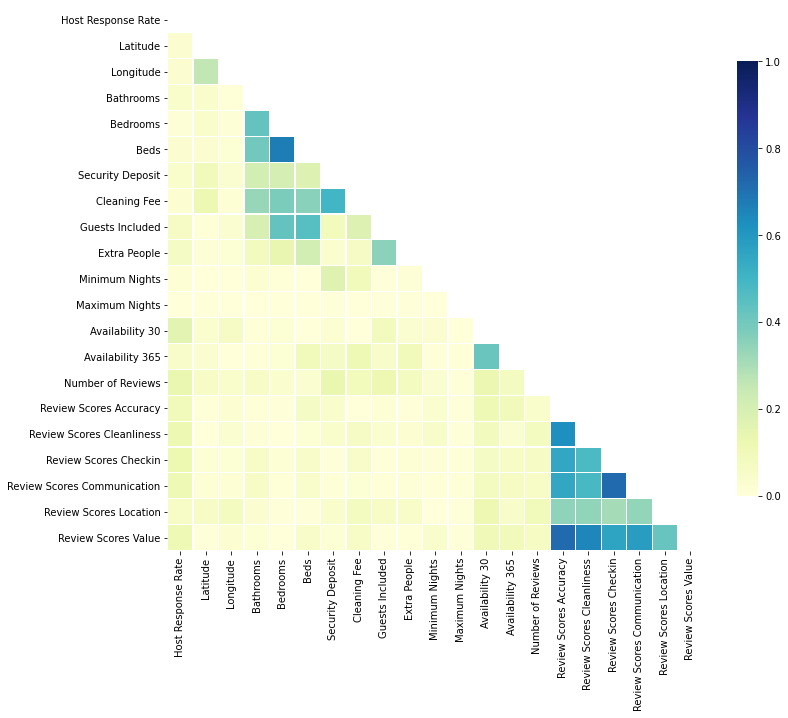

In [32]:
import seaborn as sns
import numpy as np
# Compute the correlation matrix
corr = np.abs(dfTrain.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

In [33]:
dfTrain.shape

(8445, 32)

In [34]:

print(dfTrain['Neighbourhood'].count())
print(dfTrain['Neighbourhood'].value_counts()) 
print(dfTrain['Neighbourhood'].unique())

5589
Malasaña               566
La Latina              539
Embajadores            514
Sol                    460
Justicia               360
                      ... 
El Tréntaiseis           7
Atocha                   6
Estrella                 3
Tetuán                   2
Fuencarral-El Pardo      2
Name: Neighbourhood, Length: 65, dtype: int64
['Legazpi' 'La Latina' 'Malasaña' nan 'Embajadores' 'Cuatro Caminos'
 'Justicia' 'Trafalgar' 'Nueva España' 'Fuencarral-el Pardo' 'Cortes'
 'El Viso' 'Guindalera' 'Jerónimos' 'Berruguete' 'Acacias' 'Argüelles'
 'Aluche' 'La Chopera' 'Centro' 'Sol' 'Almagro' 'Moncloa' 'Prosperidad'
 'Bellas Vistas' 'Puente de Vallecas' 'Lista' 'Usera' 'Ibiza' 'Castellana'
 'Arapiles' 'Palos do Moguer' 'Pacifico' 'Fuente del Berro' 'Palacio'
 'Hispanoamérica' 'Hortaleza' 'Ciudad Lineal' 'Ciudad Jardin' 'Vicálvaro'
 'Atocha' 'Goya' 'Gaztambide' 'Carabanchel' 'Delicias' 'San Blas'
 'Arganzuela' 'Moratalaz' 'Recoletos' 'Almenara' 'Adelfas'
 'Villa de Vallecas' 'Vall

In [35]:
print(dfTrain['Neighbourhood Cleansed'].count())
print(dfTrain['Neighbourhood Cleansed'].value_counts()) 
print(dfTrain['Neighbourhood Cleansed'].unique())

8445
Embajadores      1199
Universidad       884
Palacio           698
Sol               602
Justicia          496
                 ... 
Rosas               2
Valdemarín          2
El Plantío          2
Fuentelareina       1
Orcasitas           1
Name: Neighbourhood Cleansed, Length: 125, dtype: int64
['Legazpi' 'Embajadores' 'Universidad' 'Delicias' 'Cuatro Caminos'
 'Chopera' 'Justicia' 'Palacio' 'Trafalgar' 'Jerónimos' 'Cortes'
 'Nueva España' 'Pilar' 'El Viso' 'Guindalera' 'Goya' 'Opañel' 'Sol'
 'Berruguete' 'Acacias' 'Argüelles' 'Puerta del Angel' 'Palomeras Bajas'
 'Almagro' 'Prosperidad' 'Valdezarza' 'Bellas Vistas' 'Entrevías'
 'San Pascual' 'Lista' 'Almendrales' 'Ibiza' 'Castellana' 'Arapiles'
 'Palos de Moguer' 'Ciudad Universitaria' 'Pacífico' 'Lucero'
 'Casa de Campo' 'Aravaca' 'Valdeacederas' 'Mirasierra' 'Fuente del Berro'
 'Hispanoamérica' 'Comillas' 'Los Rosales' 'Aguilas' 'Pinar del Rey'
 'Numancia' 'Imperial' 'Quintana' 'Ciudad Jardín' 'Rios Rosas' 'Ambroz'
 'Atocha' 

In [36]:
print(dfTrain['Neighbourhood Group Cleansed'].count())
print(dfTrain['Neighbourhood Group Cleansed'].value_counts())
print(dfTrain['Neighbourhood Group Cleansed'].unique())

8445
Centro                   4365
Salamanca                 582
Chamberí                  576
Arganzuela                516
Tetuán                    299
Retiro                    295
Moncloa - Aravaca         268
Latina                    234
Chamartín                 220
Carabanchel               218
Ciudad Lineal             192
Puente de Vallecas        122
Hortaleza                 113
Fuencarral - El Pardo      96
Usera                      85
San Blas - Canillejas      71
Villaverde                 59
Barajas                    47
Moratalaz                  43
Villa de Vallecas          26
Vicálvaro                  18
Name: Neighbourhood Group Cleansed, dtype: int64
['Arganzuela' 'Centro' 'Tetuán' 'Chamberí' 'Retiro' 'Chamartín'
 'Fuencarral - El Pardo' 'Salamanca' 'Carabanchel' 'Moncloa - Aravaca'
 'Latina' 'Puente de Vallecas' 'Ciudad Lineal' 'Usera' 'Villaverde'
 'Hortaleza' 'Vicálvaro' 'San Blas - Canillejas' 'Moratalaz'
 'Villa de Vallecas' 'Barajas']


Observando los tres campos, parece que me voy a quedar con Neighbourhood Cleansed porque el Neighbourhood Group Cleansed parece que es el Distrito y Neighbourhood tiene valores nulos se parece mucho a Neighbourhood Cleansed

In [37]:
dfTrain.drop(['Neighbourhood Group Cleansed','Neighbourhood'], axis=1, inplace=True)

In [38]:
list(dfTrain.select_dtypes(include=['object']).columns)

['Thumbnail Url',
 'Host Since',
 'Host Response Time',
 'Neighbourhood Cleansed',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy']

In [39]:
print(dfTrain['Host Response Time'].count())
print(dfTrain['Host Response Time'].value_counts())
print(dfTrain['Host Response Time'].unique())

7394
within an hour        4551
within a few hours    1693
within a day           979
a few days or more     171
Name: Host Response Time, dtype: int64
['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']


In [40]:
dfTrain["Host Response Time"].fillna(dfTrain["Host Response Time"].mode()[0], inplace=True)

Elimino la variable temporal 'Host Since' para nuestro estudio

In [41]:
dfTrain.drop(['Host Since'], axis=1, inplace=True)

Eliminamos de nuestro dataset as filas con el Price nulo

In [42]:
dfTrain = dfTrain.dropna(axis=0, subset=['Price'])

In [43]:
dfTrain.shape

(8438, 29)

In [44]:
df_nn = dfTrain[list(dfTrain.select_dtypes(include=['object']).columns)]
df_nn.apply(lambda x: len(x.unique())) # valores diferentes

Thumbnail Url             6852
Host Response Time           4
Neighbourhood Cleansed     125
Property Type               20
Room Type                    3
Bed Type                     5
Cancellation Policy          5
dtype: int64

In [45]:
# tratamos los NaNs
df_nn.isna().sum()

Thumbnail Url             1585
Host Response Time           0
Neighbourhood Cleansed       0
Property Type                0
Room Type                    0
Bed Type                     0
Cancellation Policy          0
dtype: int64

In [46]:
df_num = dfTrain[list(dfTrain.select_dtypes(include=['float64']).columns)]

In [47]:
# tratamos los NaNs
df_num.isna().sum()

Host Response Rate             1050
Latitude                          0
Longitude                         0
Bathrooms                        26
Bedrooms                         13
Beds                             30
Price                             0
Security Deposit               4791
Cleaning Fee                   3404
Review Scores Accuracy         1850
Review Scores Cleanliness      1846
Review Scores Checkin          1854
Review Scores Communication    1847
Review Scores Location         1855
Review Scores Value            1854
dtype: int64

In [48]:
# aquí creamos nuestra estructura de datos, que va a consistir en la url de la
# imagen y un índice para saber donde insertarla en nuestro array
images_paths_train = [[i, img_url] for i, img_url in enumerate(dfTrain['Thumbnail Url'])]

In [49]:
dfTrain.drop(['Thumbnail Url'], axis=1, inplace=True)

In [50]:
# vamos a ver cómo ha quedado
images_paths_train[:5]

[[0,
  'https://a0.muscache.com/im/pictures/0b30dfaa-6b5c-4dc6-8918-50273b062a34.jpg?aki_policy=small'],
 [1,
  'https://a0.muscache.com/im/pictures/68892221/b98cda30_original.jpg?aki_policy=small'],
 [2,
  'https://a0.muscache.com/im/pictures/37700106/153efc0e_original.jpg?aki_policy=small'],
 [3,
  'https://a0.muscache.com/im/pictures/c7a44862-fc01-49e2-b32e-b4f72d58b937.jpg?aki_policy=small'],
 [4, nan]]

In [51]:
import imageio as io
import cv2

# esta es la función que se descargará la imagen y devolverá la imagen y el 
# índice indicando la posición donde se incrustará la imagen en nuestro array
def get_image(data_url, target_size=(224, 224)):
    idx, url = data_url
    try:
        img = io.imread(url)
        # hay alguna imagen en blanco y negro y daría error al incluirla en 
        # nuestro array de imagenes que tiene 3 canales, así que convertimos
        # todas las imágenes que tengan menos de 3 dimensiones a color
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
    except IOError as err:
        return (None, idx)

In [52]:
import numpy as np

# en este array iremos incrustando las imágenes conforme las vayamos obteniendo
loaded_images_train = np.zeros((len(images_paths_train), 224, 224, 3), dtype=np.uint8)

# y en este array llevaremos un control de cuales se han cargado correctamente
# y cuales no
was_loaded_train = np.zeros(len(images_paths_train))

In [53]:
print(loaded_images_train.shape)

(8438, 224, 224, 3)


In [54]:
import concurrent
from tqdm import tqdm

# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths_train), total=len(images_paths_train)):
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images_train[idx] = img
            was_loaded_train[idx] = 1
        else:
            was_loaded_train[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded_train)}/{len(images_paths_train)}')

100%|██████████| 8438/8438 [03:05<00:00, 45.50it/s]

Terminado!
Total de imágenes recuperadas correctamente: 6842.0/8438


In [55]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images_train.npy', loaded_images_train)
np.save('was_loaded_train.npy', was_loaded_train)

In [56]:
# montamos GDrive
# from google.colab import drive
# drive.mount('/content/drive')

In [57]:
# almacenamos las imagenes en nuestro drive
!cp images_train.npy /content/drive/My\ Drive/images_train.npy
!cp was_loaded_train.npy /content/drive/My\ Drive/was_loaded_train.npy

In [58]:
!ls -lah images_train.npy was_loaded_train.npy

-rw-r--r-- 1 root root 1.2G Jun 27 19:36 images_train.npy
-rw-r--r-- 1 root root  67K Jun 27 19:36 was_loaded_train.npy


In [59]:
df_nn.drop(['Thumbnail Url'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
# En train creamos un dict para usarlo después en validacion y test
# ESTO ES EN TRAIN.CSV!
mean_map = {}
for c in df_nn:
    mean = dfTrain.groupby(c)['Price'].mean()
    dfTrain[c] = dfTrain[c].map(mean)    
    mean_map[c] = mean

In [61]:
# Esto solo sirve para mover price a la primera posición
cols = dfTrain.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
dfTrain = dfTrain[cols]

dfTrain.fillna(dfTrain.mean(), inplace=True)
dfTrain.isnull().any()

Price                          False
Host Response Time             False
Host Response Rate             False
Neighbourhood Cleansed         False
Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Bathrooms                      False
Bedrooms                       False
Beds                           False
Bed Type                       False
Security Deposit               False
Cleaning Fee                   False
Guests Included                False
Extra People                   False
Minimum Nights                 False
Maximum Nights                 False
Availability 30                False
Availability 365               False
Number of Reviews              False
Review Scores Accuracy         False
Review Scores Cleanliness      False
Review Scores Checkin          False
Review Scores Communication    False
Review Scores Location         False
Review Scores Value            False
C

In [62]:
dfTrain.describe()

,Price,Host Response Time,Host Response Rate,Neighbourhood Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
count,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000
mean,66.169945,66.169945,94.858419,66.169945,40.420368,-3.697323,66.169945,66.169945,1.254398,1.286647,1.987036,66.169945,184.063614,30.136075,1.572766,7.409102,3.044916,996.177412,8.673027,205.930908,23.039227,9.424104,9.340716,9.629708,9.652708,9.561294,9.222509,66.169945
std,56.590532,3.312915,14.176606,19.219206,0.019946,0.022986,7.119274,26.384540,0.609677,0.837145,1.522522,2.048428,71.337492,21.101329,1.072506,10.473895,14.169624,11049.764109,9.008582,126.827263,37.869125,0.806299,0.880077,0.694995,0.665979,0.668375,0.837023,8.633396
min,9.000000,59.587334,0.000000,16.500000,40.331888,-3.835498,20.000000,31.500000,0.000000,0.000000,1.000000,42.105263,70.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,56.942584
25%,30.000000,65.631541,94.858419,56.466667,40.410002,-3.707718,67.937212,33.872485,1.000000,1.000000,1.000000,66.466182,184.063614,20.000000,1.000000,0.000000,1.000000,365.000000,0.000000,84.000000,1.000000,9.000000,9.000000,9.629708,9.652708,9.000000,9.000000,56.942584
50%,53.000000,65.631541,100.000000,67.912797,40.418435,-3.701621,67.937212,87.656022,1.000000,1.000000,1.987036,66.466182,184.063614,30.136075,1.000000,0.000000,2.000000,1125.000000,6.000000,248.000000,8.000000,9.424104,9.340716,10.000000,10.000000,10.000000,9.222509,62.609040
75%,80.000000,65.631541,100.000000,79.514113,40.427610,-3.693882,67.937212,87.656022,1.000000,1.286647,2.000000,66.466182,184.063614,30.136075,2.000000,15.000000,3.000000,1125.000000,13.000000,321.000000,28.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,76.782473
max,875.000000,72.816568,100.000000,188.375000,40.514247,-3.575142,220.000000,87.656022,8.000000,10.000000,16.000000,66.466182,990.000000,500.000000,16.000000,274.000000,1125.000000,1000000.000000,30.000000,365.000000,446.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,108.666667


### Preparamos las etiquetas

In [63]:
# nos quedamos con los datos para los que hemos podido encontrar imágenes
dfTrain_with_imgs = dfTrain[was_loaded_train == 1]

In [64]:
# seleccionamos la que será nuestra etiqueta
y_train_reg = dfTrain_with_imgs['Price']

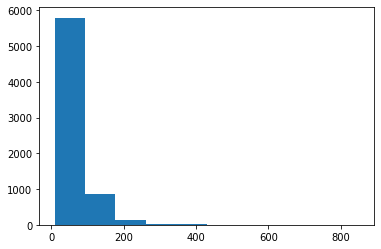

In [65]:
# y un rango para clasificación (del 1 al 3 por ejemplo: barato, normal, caro)
import matplotlib.pyplot as plt
plt.hist(y_train_reg, bins=10)
plt.show()

In [66]:
y_train_class = []
for x in y_train_reg:
    # barato
    if x <= 50:
        y_train_class.append(0)
    elif x <=150:
        y_train_class.append(1)
    else:
        y_train_class.append(2)

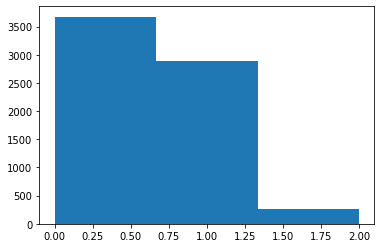

In [67]:
# veamos cómo ha quedado la distribución al convertirla a 3 clases
plt.hist(y_train_class, bins=3)
plt.show()

In [68]:
from sklearn import preprocessing

dataTrain = dfTrain_with_imgs.values

#y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = dataTrain[:,1:]      # nos quedamos con el resto

feature_names = dfTrain_with_imgs.columns[1:]




In [69]:

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
dfTrain_norm = scaler.transform(X_train)
#

In [70]:
dfTrain_norm[0]


array([0.87019516, 1.        , 0.17896296, 0.30493606, 0.55915086,
       0.19361874, 1.        , 0.125     , 0.1       , 0.06666667,
       1.        , 0.13742604, 0.02439024, 0.        , 0.        ,
       0.04      , 0.001124  , 0.        , 0.01917808, 0.00224215,
       1.        , 1.        , 1.        , 1.        , 0.75      ,
       0.75      , 0.        ])

Ahora voy hacer las mismas transformaciones para el dataset de validacion

In [71]:
dfVal = pd.read_csv('./val.csv', sep=';', decimal='.')
dfVal_Madrid = dfVal[dfVal['City']!='Madrid']
dfVal.drop(dfVal_Madrid.index, inplace = True)
dfVal.drop(columnas_loc, axis=1, inplace=True)
dfVal.drop(columnas_nulos, axis=1, inplace=True)
dfVal.drop(columnas_cr, axis=1, inplace=True)
dfVal.drop(['Neighbourhood Group Cleansed','Neighbourhood'], axis=1, inplace=True)
dfVal["Host Response Time"].fillna(dfVal["Host Response Time"].mode()[0], inplace=True)
dfVal.drop(['Host Since'], axis=1, inplace=True)
images_paths_val = [[i, img_url] for i, img_url in enumerate(dfVal['Thumbnail Url'])]
dfVal.drop(['Thumbnail Url'], axis=1, inplace=True)
# en este array iremos incrustando las imágenes conforme las vayamos obteniendo
loaded_images_val = np.zeros((len(images_paths_val), 224, 224, 3), dtype=np.uint8)

# y en este array llevaremos un control de cuales se han cargado correctamente
# y cuales no
was_loaded_val = np.zeros(len(images_paths_val))

In [72]:
# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths_val), total=len(images_paths_val)):
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images_val[idx] = img
            was_loaded_val[idx] = 1
        else:
            was_loaded_val[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded_val)}/{len(images_paths_val)}')

100%|██████████| 2108/2108 [00:53<00:00, 39.38it/s]

Terminado!
Total de imágenes recuperadas correctamente: 1726.0/2108


In [73]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images_val.npy', loaded_images_val)
np.save('was_loaded_val.npy', was_loaded_val)

In [74]:
# almacenamos las imagenes en nuestro drive
!cp images_val.npy /content/drive/My\ Drive/images_val.npy
!cp was_loaded_val.npy /content/drive/My\ Drive/was_loaded_val.npy

In [75]:

# Categorizamos con los datos de train!
for c in df_nn:
    dfVal[c] = dfVal[c].map(mean_map[c])

In [76]:
cols = dfVal.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
dfVal = dfVal[cols]

dfVal.fillna(dfTrain.mean(), inplace=True)
dfVal.isnull().any()

Price                          False
Host Response Time             False
Host Response Rate             False
Neighbourhood Cleansed         False
Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Bathrooms                      False
Bedrooms                       False
Beds                           False
Bed Type                       False
Security Deposit               False
Cleaning Fee                   False
Guests Included                False
Extra People                   False
Minimum Nights                 False
Maximum Nights                 False
Availability 30                False
Availability 365               False
Number of Reviews              False
Review Scores Accuracy         False
Review Scores Cleanliness      False
Review Scores Checkin          False
Review Scores Communication    False
Review Scores Location         False
Review Scores Value            False
C

In [77]:
dfVal.describe()

,Price,Host Response Time,Host Response Rate,Neighbourhood Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
count,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000
mean,65.202168,66.260870,94.959574,65.872917,40.419821,-3.697051,66.259090,65.692588,1.248007,1.328953,1.973866,66.148107,182.845286,29.035978,1.567362,7.312619,2.852467,923.350095,8.756641,199.768975,23.309772,9.407452,9.335802,9.619157,9.646715,9.533817,9.206100,66.388207
std,54.247889,3.267146,14.387744,19.472233,0.019965,0.023546,6.292588,26.465295,0.575176,0.809385,1.421838,2.215387,73.239509,18.062080,1.092198,10.585852,5.406895,3090.667062,9.171988,127.483866,40.020858,0.806492,0.856777,0.715007,0.704331,0.671114,0.831608,8.685393
min,9.000000,59.587334,0.000000,17.000000,40.345599,-3.783810,33.240000,31.500000,0.000000,0.000000,1.000000,42.105263,70.000000,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,56.942584
25%,30.000000,65.631541,94.858419,53.863636,40.409773,-3.707970,67.937212,33.872485,1.000000,1.000000,1.000000,66.466182,184.063614,20.000000,1.000000,0.000000,1.000000,360.000000,0.000000,77.000000,1.000000,9.000000,9.000000,9.629708,9.652708,9.000000,9.000000,56.942584
50%,52.000000,65.631541,100.000000,67.912797,40.417879,-3.701551,67.937212,87.656022,1.000000,1.000000,2.000000,66.466182,184.063614,30.136075,1.000000,0.000000,2.000000,1125.000000,6.000000,230.000000,7.000000,9.424104,9.340716,10.000000,10.000000,10.000000,9.222509,62.609040
75%,80.000000,65.631541,100.000000,79.514113,40.427791,-3.693484,67.937212,87.656022,1.000000,2.000000,2.000000,66.466182,184.063614,30.136075,2.000000,13.000000,3.000000,1125.000000,14.000000,317.000000,28.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,76.782473
max,600.000000,72.816568,100.000000,188.375000,40.507577,-3.573613,86.769231,87.656022,6.000000,8.000000,16.000000,66.466182,950.000000,250.000000,15.000000,250.000000,120.000000,100000.000000,30.000000,365.000000,389.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,108.666667


In [78]:
# nos quedamos con los datos para los que hemos podido encontrar imágenes
dfVal_with_imgs = dfVal[was_loaded_val == 1]

In [79]:
# seleccionamos la que será nuestra etiqueta
y_val_reg = dfVal_with_imgs['Price']

In [80]:
y_val_class = []
for x in y_val_reg:
    # barato
    if x <= 50:
        y_val_class.append(0)
    elif x <=150:
        y_val_class.append(1)
    else:
        y_val_class.append(2)

In [81]:
data_val = dfVal_with_imgs.values

y_val = data_val[:,0:1]     # nos quedamos con la 1ª columna, price
X_val = data_val[:,1:]      # nos quedamos con el resto

feature_names_val = dfVal_with_imgs.columns[1:]



Realizo con el scaler anterior, basado en los datos de training

In [82]:
dfVal_norm = scaler.transform(X_val) 

Convertimos las etiquetas a onehot

In [83]:
from keras.utils import to_categorical
y_class_train_onehot = to_categorical(y_train_class)
y_class_val_onehot = to_categorical(y_val_class)


Using TensorFlow backend.


In [84]:
y_class_train_onehot.shape

(6842, 3)

In [85]:
y_class_val_onehot.shape

(1726, 3)

**Generación de modelo de clasificacion con variable numéricas y categóricas**

In [86]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

model0 = Sequential()
model0.add(Dense(64, input_shape=(dfTrain_norm.shape[1],), activation='relu'))

model0.add(Dense(32, activation='relu'))

model0.add(Dense(3, activation='softmax'))  # tenemos 3 clases


opt = Adam(learning_rate=0.0001)
model0.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

h0=model0.fit(dfTrain_norm, y_class_train_onehot,
          validation_data=(dfVal_norm, y_class_val_onehot),
          epochs=50,
          batch_size=8)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 6842 samples, validate on 1726 samples
Epoch 1/50
6842/6842 [==============================] - 4s 648us/step - loss: 0.7452 - accuracy: 0.7327 - val_loss: 0.6242 - val_accuracy: 0.7990
Epoch 2/50
6842/6842 [==============================] - 3s 391us/step - loss: 0.5739 - accuracy: 0.8001 - val_loss: 0.5646 - val_accuracy: 0.8030
Epoch 3/50
6842/6842 [==============================] - 3s 392us/step - loss: 0.5335 - accuracy: 0.7999 - val_loss: 0.5322 - val_accuracy: 0.8042
Epoch 4/50
6842/6842 [==============================] - 3s 390us/step - loss: 0.5109 - accuracy: 0.7998 - val_loss: 0.5083 - val_accuracy: 0.8019
Epoch 5/50
6842/6842 [==============================] - 3s 384us/step - loss: 0.4928 - accuracy: 0.7999 - val_loss: 0.4893 - val_accuracy: 0.8030
Epoch 6/50
6842/6842 [==============================] - 3s 384us/step - loss: 0.4779 - accuracy: 0.8031 - val_loss: 0.4736 - val_accuracy: 0

Text(0, 0.5, 'loss')

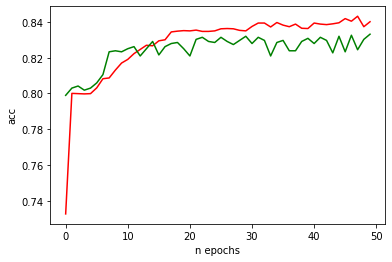

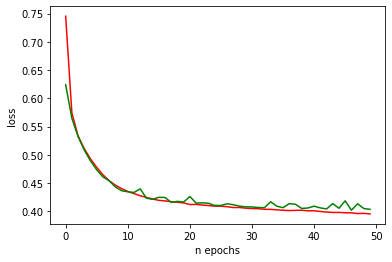

In [87]:
# pintamos gráficas de pérdidas y precisión
plt.figure(0)
plt.plot(h0.history['accuracy'], 'r')
plt.plot(h0.history['val_accuracy'], 'g')
plt.xlabel('n epochs')
plt.ylabel('acc')

plt.figure(1)
plt.plot(h0.history['loss'], 'r')
plt.plot(h0.history['val_loss'], 'g')
plt.xlabel('n epochs')
plt.ylabel('loss')

In [88]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

model1 = Sequential()
model1.add(Dense(64, input_shape=(dfTrain_norm.shape[1],), activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(3, activation='softmax'))  # tenemos 3 clases


opt = Adam(learning_rate=0.0001)
model1.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

h1=model1.fit(dfTrain_norm, y_class_train_onehot,
          validation_data=(dfVal_norm, y_class_val_onehot),
          epochs=50,
          batch_size=8)

Train on 6842 samples, validate on 1726 samples
Epoch 1/50
6842/6842 [==============================] - 3s 446us/step - loss: 0.7872 - accuracy: 0.6567 - val_loss: 0.6486 - val_accuracy: 0.8024
Epoch 2/50
6842/6842 [==============================] - 3s 426us/step - loss: 0.6295 - accuracy: 0.7702 - val_loss: 0.5700 - val_accuracy: 0.8030
Epoch 3/50
6842/6842 [==============================] - 3s 423us/step - loss: 0.5844 - accuracy: 0.7866 - val_loss: 0.5453 - val_accuracy: 0.8030
Epoch 4/50
6842/6842 [==============================] - 3s 430us/step - loss: 0.5624 - accuracy: 0.7954 - val_loss: 0.5283 - val_accuracy: 0.8036
Epoch 5/50
6842/6842 [==============================] - 3s 434us/step - loss: 0.5495 - accuracy: 0.7938 - val_loss: 0.5173 - val_accuracy: 0.8024
Epoch 6/50
6842/6842 [==============================] - 3s 430us/step - loss: 0.5315 - accuracy: 0.7990 - val_loss: 0.5031 - val_accuracy: 0.8059
Epoch 7/50
6842/6842 [==============================] - 3s 421us/step - loss

Text(0, 0.5, 'loss')

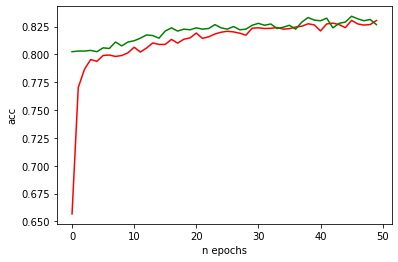

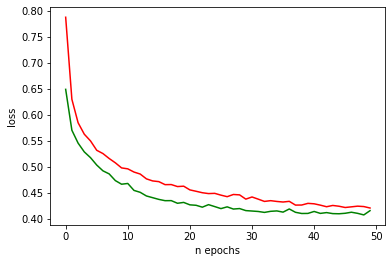

In [89]:
# pintamos gráficas de pérdidas y precisión
plt.figure(0)
plt.plot(h1.history['accuracy'], 'r')
plt.plot(h1.history['val_accuracy'], 'g')
plt.xlabel('n epochs')
plt.ylabel('acc')

plt.figure(1)
plt.plot(h1.history['loss'], 'r')
plt.plot(h1.history['val_loss'], 'g')
plt.xlabel('n epochs')
plt.ylabel('loss')



In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

model2 = Sequential()
model2.add(Dense(128, input_shape=(dfTrain_norm.shape[1],), activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(3, activation='softmax'))  # tenemos 3 clases

opt = Adam(learning_rate=0.0001)
model2.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

h2=model2.fit(dfTrain_norm, y_class_train_onehot,
          validation_data=(dfVal_norm, y_class_val_onehot),
          epochs=50,
          batch_size=8)

Train on 6842 samples, validate on 1726 samples
Epoch 1/50
6842/6842 [==============================] - 3s 488us/step - loss: 0.7473 - accuracy: 0.6700 - val_loss: 0.5739 - val_accuracy: 0.8030
Epoch 2/50
6842/6842 [==============================] - 3s 462us/step - loss: 0.5928 - accuracy: 0.7853 - val_loss: 0.5374 - val_accuracy: 0.8030
Epoch 3/50
6842/6842 [==============================] - 3s 463us/step - loss: 0.5607 - accuracy: 0.7947 - val_loss: 0.5169 - val_accuracy: 0.8030
Epoch 4/50
6842/6842 [==============================] - 3s 462us/step - loss: 0.5386 - accuracy: 0.7958 - val_loss: 0.4960 - val_accuracy: 0.8030
Epoch 5/50
6842/6842 [==============================] - 3s 462us/step - loss: 0.5217 - accuracy: 0.7977 - val_loss: 0.4759 - val_accuracy: 0.8042
Epoch 6/50
6842/6842 [==============================] - 3s 458us/step - loss: 0.5019 - accuracy: 0.7966 - val_loss: 0.4640 - val_accuracy: 0.8100
Epoch 7/50
6842/6842 [==============================] - 3s 462us/step - loss

Text(0, 0.5, 'loss')

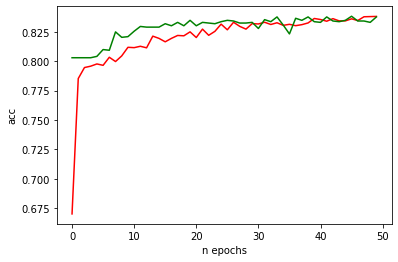

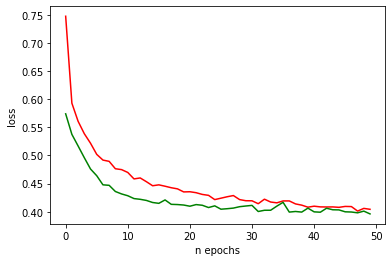

In [91]:
# pintamos gráficas de pérdidas y precisión
plt.figure(0)
plt.plot(h2.history['accuracy'], 'r')
plt.plot(h2.history['val_accuracy'], 'g')
plt.xlabel('n epochs')
plt.ylabel('acc')

plt.figure(1)
plt.plot(h2.history['loss'], 'r')
plt.plot(h2.history['val_loss'], 'g')
plt.xlabel('n epochs')
plt.ylabel('loss')

In [92]:
dfTest = pd.read_csv('./test.csv', sep=';', decimal='.')
dfTest_Madrid = dfTest[dfTest['City']!='Madrid']
dfTest.drop(dfTest_Madrid.index, inplace = True)
dfTest.drop(columnas_loc, axis=1, inplace=True)
dfTest.drop(columnas_nulos, axis=1, inplace=True)
dfTest.drop(columnas_cr, axis=1, inplace=True)
dfTest.drop(['Neighbourhood Group Cleansed','Neighbourhood'], axis=1, inplace=True)
dfTest["Host Response Time"].fillna(dfTest["Host Response Time"].mode()[0], inplace=True)
dfTest.drop(['Host Since'], axis=1, inplace=True)


In [93]:
images_paths_test = [[i, img_url] for i, img_url in enumerate(dfTest['Thumbnail Url'])]
dfTest.drop(['Thumbnail Url'], axis=1, inplace=True)
# en este array iremos incrustando las imágenes conforme las vayamos obteniendo
loaded_images_test = np.zeros((len(images_paths_test), 224, 224, 3), dtype=np.uint8)

# y en este array llevaremos un control de cuales se han cargado correctamente
# y cuales no
was_loaded_test = np.zeros(len(images_paths_test))

In [94]:
# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths_test), total=len(images_paths_test)):
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images_test[idx] = img
            was_loaded_test[idx] = 1
        else:
            was_loaded_test[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded_test)}/{len(images_paths_test)}')

100%|██████████| 2654/2654 [00:57<00:00, 46.37it/s]

Terminado!
Total de imágenes recuperadas correctamente: 2136.0/2654


In [95]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images_test.npy', loaded_images_test)
np.save('was_loaded_test.npy', was_loaded_test)

In [96]:
# almacenamos las imagenes en nuestro drive
!cp images_test.npy /content/drive/My\ Drive/images_test.npy
!cp was_loaded_test.npy /content/drive/My\ Drive/was_loaded_test.npy

In [97]:
# Categorizamos con los datos de train!
for c in df_nn:
    dfTest[c] = dfTest[c].map(mean_map[c])

In [98]:
cols = dfTest.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
dfTest = dfTest[cols]

dfTest.fillna(dfTrain.mean(), inplace=True)
dfTest.isnull().any()

Price                          False
Host Response Time             False
Host Response Rate             False
Neighbourhood Cleansed         False
Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Bathrooms                      False
Bedrooms                       False
Beds                           False
Bed Type                       False
Security Deposit               False
Cleaning Fee                   False
Guests Included                False
Extra People                   False
Minimum Nights                 False
Maximum Nights                 False
Availability 30                False
Availability 365               False
Number of Reviews              False
Review Scores Accuracy         False
Review Scores Cleanliness      False
Review Scores Checkin          False
Review Scores Communication    False
Review Scores Location         False
Review Scores Value            False
C

In [99]:
dfTest.describe()

,Price,Host Response Time,Host Response Rate,Neighbourhood Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
count,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000
mean,65.718979,66.140232,94.694312,66.061300,40.421692,-3.696634,66.091302,65.796556,1.248794,1.289915,1.990150,66.156081,183.667192,29.492309,1.587415,7.406933,3.089299,868.705350,8.767521,208.262246,23.286737,9.372661,9.286679,9.607974,9.625388,9.512834,9.194150,65.991542
std,55.516519,3.341082,14.211604,19.311457,0.020338,0.024295,7.377897,26.457787,0.573371,0.801746,1.527206,2.187084,69.081362,17.468118,1.111096,10.778070,12.843425,840.545254,9.050046,127.103985,39.226928,0.869603,0.905981,0.710010,0.660586,0.713927,0.882095,8.571198
min,10.000000,59.587334,0.000000,16.500000,40.333826,-3.819501,20.500000,31.500000,0.000000,0.000000,1.000000,42.105263,70.000000,4.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,56.942584
25%,32.000000,65.631541,94.858419,53.863636,40.410451,-3.707749,67.937212,33.872485,1.000000,1.000000,1.000000,66.466182,184.063614,20.000000,1.000000,0.000000,1.000000,365.000000,0.000000,87.000000,1.000000,9.000000,9.000000,9.629708,9.652708,9.000000,9.000000,56.942584
50%,51.500000,65.631541,100.000000,67.912797,40.419690,-3.701381,67.937212,87.656022,1.000000,1.000000,1.987036,66.466182,184.063614,30.136075,1.000000,5.000000,2.000000,1125.000000,6.000000,253.000000,7.000000,9.424104,9.340716,10.000000,10.000000,9.561294,9.222509,62.609040
75%,80.000000,65.631541,100.000000,79.514113,40.428478,-3.693856,67.937212,87.656022,1.000000,2.000000,2.000000,66.466182,184.063614,30.136075,2.000000,14.000000,3.000000,1125.000000,13.000000,322.000000,26.750000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,76.782473
max,650.000000,72.816568,100.000000,188.375000,40.510732,-3.576461,220.000000,87.656022,6.000000,10.000000,16.000000,66.466182,900.000000,250.000000,12.000000,276.000000,365.000000,30000.000000,30.000000,365.000000,331.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,76.782473


In [100]:
# nos quedamos con los datos para los que hemos podido encontrar imágenes
dfTest_with_imgs = dfTest[was_loaded_test == 1]

In [101]:
# seleccionamos la que será nuestra etiqueta
y_test_reg = dfTest_with_imgs['Price']

In [102]:
y_test_class = []
for x in y_test_reg:
    # barato
    if x <= 50:
        y_test_class.append(0)
    elif x <=150:
        y_test_class.append(1)
    else:
        y_test_class.append(2)

In [103]:
data_test = dfTest_with_imgs.values

#y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

feature_names_test = dfTest_with_imgs.columns[1:]



In [104]:
dfTest_norm = scaler.transform(X_test) 

In [105]:
y_class_test_onehot = to_categorical(y_test_class)

Se observa que tras hacer cambios en el modelo no se observan grandes mejorías, he hecho pruebas metiendo regularización, aumentando las épocas ero no ha subido más, estaba todo a un 82% de acierto.

In [106]:
loss, acc = model0.evaluate(dfTest_norm, y_class_test_onehot)
print(f'Loss={loss}, Acc={acc}')

2136/2136 [==============================] - 0s 59us/step
Loss=0.4218532278966368, Acc=0.824438214302063


**Modelo de Regresion**

In [107]:
y_train_reg.max()

850.0

In [108]:
maxPrice = y_train_reg.max()
print(f'Max precio={maxPrice}')
trainY_nom = y_train_reg / maxPrice
valY_nom = y_val_reg/ maxPrice
testY_norm = y_test_reg/ maxPrice


Max precio=850.0


In [109]:
# Creamos un modelo para hacer regresión con y_reg
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.constraints import max_norm

modelr = Sequential()
modelr.add(Dense(64, input_shape=(dfTrain_norm.shape[1],), activation='relu', kernel_regularizer=l2(0.002)))
modelr.add(Dropout(0.2))
modelr.add(Dense(32, activation='relu', kernel_regularizer=l2(0.002)))
modelr.add(Dropout(0.2))
modelr.add(Dense(32, activation='relu', kernel_regularizer=l2(0.002)))
modelr.add(Dropout(0.2))
modelr.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
opt = Adam(learning_rate=0.00001)
modelr.compile(loss='mean_squared_error', optimizer=opt)

hr=modelr.fit(dfTrain_norm, trainY_nom,
          validation_data=(dfVal_norm, valY_nom), epochs=200, shuffle=True,
    verbose=2)



Train on 6842 samples, validate on 1726 samples
Epoch 1/200
 - 1s - loss: 0.2692 - val_loss: 0.2265
Epoch 2/200
 - 1s - loss: 0.2579 - val_loss: 0.2234
Epoch 3/200
 - 1s - loss: 0.2495 - val_loss: 0.2201
Epoch 4/200
 - 1s - loss: 0.2415 - val_loss: 0.2168
Epoch 5/200
 - 1s - loss: 0.2347 - val_loss: 0.2135
Epoch 6/200
 - 1s - loss: 0.2294 - val_loss: 0.2101
Epoch 7/200
 - 1s - loss: 0.2235 - val_loss: 0.2068
Epoch 8/200
 - 1s - loss: 0.2192 - val_loss: 0.2036
Epoch 9/200
 - 1s - loss: 0.2141 - val_loss: 0.2003
Epoch 10/200
 - 1s - loss: 0.2089 - val_loss: 0.1971
Epoch 11/200
 - 1s - loss: 0.2045 - val_loss: 0.1939
Epoch 12/200
 - 1s - loss: 0.2007 - val_loss: 0.1907
Epoch 13/200
 - 1s - loss: 0.1962 - val_loss: 0.1875
Epoch 14/200
 - 1s - loss: 0.1921 - val_loss: 0.1843
Epoch 15/200
 - 1s - loss: 0.1886 - val_loss: 0.1811
Epoch 16/200
 - 1s - loss: 0.1848 - val_loss: 0.1780
Epoch 17/200
 - 1s - loss: 0.1809 - val_loss: 0.1748
Epoch 18/200
 - 1s - loss: 0.1774 - val_loss: 0.1716
Epoch 1

Text(0, 0.5, 'loss')

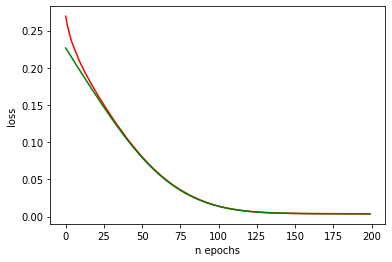

In [110]:
plt.figure(0)
plt.plot(hr.history['loss'], 'r')
plt.plot(hr.history['val_loss'], 'g')
plt.xlabel('n epochs')
plt.ylabel('loss')

In [111]:
loss = modelr.evaluate(dfTest_norm, testY_norm)
print(f'Loss={loss}')

2136/2136 [==============================] - 0s 46us/step
Loss=0.0038141866811038402


Error medio absoluto: 24.260803624485316


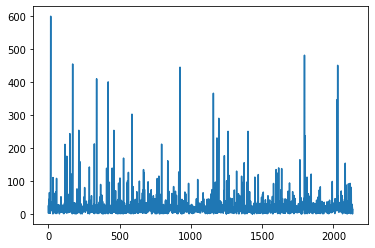

In [112]:
y_pred = modelr.predict(dfTest_norm)
y_pred_denorm = y_pred[:, 0] * maxPrice
y_test_denorm = testY_norm * maxPrice
error_denorm = np.abs(y_pred_denorm - y_test_denorm)
plt.plot(range(y_pred.shape[0]), error_denorm)
print(f'Error medio absoluto: {error_denorm.mean()}')

In [113]:
for y, pred, error in zip(y_test_denorm, y_pred_denorm, error_denorm):
  print(f'Valor: {y:.2f} Predición: {pred:.2f}. Error: {error:.2f}')

Valor: 25.00 Predición: 48.73. Error: 23.73
Valor: 65.00 Predición: 67.78. Error: 2.78
Valor: 78.00 Predición: 75.89. Error: 2.11
Valor: 49.00 Predición: 80.53. Error: 31.53
Valor: 25.00 Predición: 45.26. Error: 20.26
Valor: 25.00 Predición: 46.84. Error: 21.84
Valor: 11.00 Predición: 55.83. Error: 44.83
Valor: 55.00 Predición: 74.83. Error: 19.83
Valor: 145.00 Predición: 80.29. Error: 64.71
Valor: 43.00 Predición: 69.40. Error: 26.40
Valor: 73.00 Predición: 74.90. Error: 1.90
Valor: 43.00 Predición: 74.30. Error: 31.30
Valor: 60.00 Predición: 76.11. Error: 16.11
Valor: 20.00 Predición: 38.73. Error: 18.73
Valor: 71.00 Predición: 73.43. Error: 2.43
Valor: 52.00 Predición: 72.36. Error: 20.36
Valor: 300.00 Predición: 50.23. Error: 249.77
Valor: 650.00 Predición: 49.96. Error: 600.04
Valor: 25.00 Predición: 41.12. Error: 16.12
Valor: 21.00 Predición: 39.60. Error: 18.60
Valor: 30.00 Predición: 43.75. Error: 13.75
Valor: 20.00 Predición: 51.89. Error: 31.89
Valor: 62.00 Predición: 45.05. 

In [114]:
print(f'Error absoluto: {np.mean(error_denorm)}')
print(f'Error cuadrático medio: {np.mean(error_denorm**2)}')

Error absoluto: 24.260803624485316
Error cuadrático medio: 2131.865905982184
